In [30]:
!pip install spotipy
import os
from getpass import getpass  # Hides input

os.environ["SPOTIPY_CLIENT_ID"] = getpass("Enter your Spotify Client ID: ").strip()
os.environ["SPOTIPY_CLIENT_SECRET"] = getpass("Enter your Spotify Client Secret: ").strip()
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:8888/callback/"


Enter your Spotify Client ID: ··········
Enter your Spotify Client Secret: ··········


In [31]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=os.environ["SPOTIPY_CLIENT_ID"],
    client_secret=os.environ["SPOTIPY_CLIENT_SECRET"]
))

print("Spotify API authentication successful!")


Spotify API authentication successful!


In [32]:
#let's store it in a dataframe
import pandas as pd
def get_artist_top_tracks(artist_name):
    results = sp.search(q=artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    tracks = sp.artist_top_tracks(artist_id)['tracks']

    data = []
    for track in tracks:
        data.append([
            track['name'],  # Song Name
            track['album']['name'],  # Album Name
            track['popularity'],  # Popularity Score
            track['duration_ms'] // 1000,  # Duration (seconds)
            track['external_urls']['spotify']  # Spotify Link
        ])

    df = pd.DataFrame(data, columns=['Song', 'Album', 'Popularity', 'Duration (s)', 'Spotify URL'])
    return df

# Example: Extract top songs of 'Taylor Swift'
df = get_artist_top_tracks("Taylor Swift")

# Save to CSV
df.to_csv("Taylor_Swift_top_tracks.csv", index=False)
pd.set_option('display.max_colwidth', None)  # Show full URLs
from IPython.display import display
display(df.head(10))


,Song,Album,Popularity,Duration (s),Spotify URL
0,Cruel Summer,Lover,89,178,https://open.spotify.com/track/1BxfuPKGuaTgP7aM0Bbdwr
1,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,84,228,https://open.spotify.com/track/2OzhQlSqBEmt7hmkYxfT6m
2,cardigan,folklore,85,239,https://open.spotify.com/track/4R2kfaDFhslZEMJqAFNpdd
3,Lover,Lover,85,221,https://open.spotify.com/track/1dGr1c8CrMLDpV6mPbImSI
4,august,folklore,84,261,https://open.spotify.com/track/3hUxzQpSfdDqwM3ZTFQY0K
5,I Can Do It With a Broken Heart,THE TORTURED POETS DEPARTMENT,82,218,https://open.spotify.com/track/4q5YezDOIPcoLr8R81x9qy
6,Blank Space,1989,73,231,https://open.spotify.com/track/1p80LdxRV74UKvL8gnD7ky
7,I Don’t Wanna Live Forever (Fifty Shades Darker),reputation Stadium Tour Surprise Song Playlist,83,247,https://open.spotify.com/track/55n9yjI6qqXh5F2mYvUc2y
8,Don’t Blame Me,reputation,84,236,https://open.spotify.com/track/1R0a2iXumgCiFb7HEZ7gUE
9,Anti-Hero,Midnights,83,200,https://open.spotify.com/track/0V3wPSX9ygBnCm8psDIegu


In [33]:
#Find the most popular song →
df.loc[df["Popularity"].idxmax()]

,0
Song,Cruel Summer
Album,Lover
Popularity,89
Duration (s),178
Spotify URL,https://open.spotify.com/track/1BxfuPKGuaTgP7aM0Bbdwr


In [34]:
#Find the longest song →
df.loc[df['Duration (s)'].idxmax()]


,4
Song,august
Album,folklore
Popularity,84
Duration (s),261
Spotify URL,https://open.spotify.com/track/3hUxzQpSfdDqwM3ZTFQY0K


In [35]:
#Count how many songs are from each album →
df['Album'].value_counts()


,count
Album,
Lover,2
THE TORTURED POETS DEPARTMENT,2
folklore,2
1989,1
reputation Stadium Tour Surprise Song Playlist,1
reputation,1
Midnights,1


In [36]:
#Find the least popular song
df.loc[df["Popularity"].idxmin()]

,6
Song,Blank Space
Album,1989
Popularity,73
Duration (s),231
Spotify URL,https://open.spotify.com/track/1p80LdxRV74UKvL8gnD7ky


In [37]:
#Average Popularity of all songs
df["Popularity"].mean()

np.float64(83.2)

In [38]:
print(df.loc[df['Duration (s)'].idxmax()])  # Longest song
print(df.loc[df['Duration (s)'].idxmin()])  # Shortest song


Song                                                           august
Album                                                        folklore
Popularity                                                         84
Duration (s)                                                      261
Spotify URL     https://open.spotify.com/track/3hUxzQpSfdDqwM3ZTFQY0K
Name: 4, dtype: object
Song                                                     Cruel Summer
Album                                                           Lover
Popularity                                                         89
Duration (s)                                                      178
Spotify URL     https://open.spotify.com/track/1BxfuPKGuaTgP7aM0Bbdwr
Name: 0, dtype: object


##VISUALIZATIONS


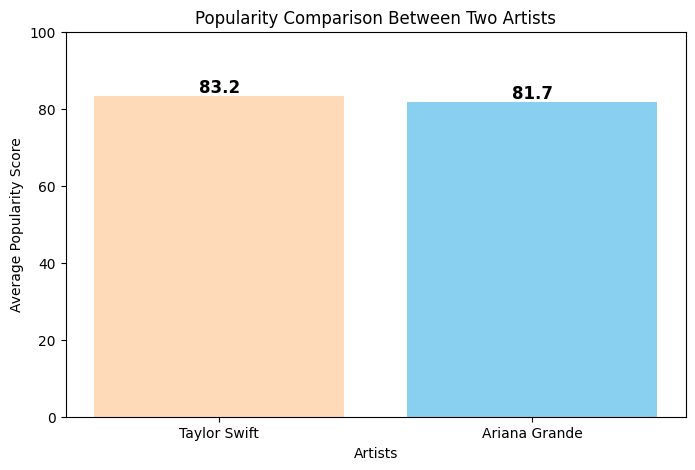

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def get_artist_top_tracks(artist_name):
    results = sp.search(q=artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    tracks = sp.artist_top_tracks(artist_id)['tracks']

    data = []
    for track in tracks:
        data.append([
            track['name'],  # Song Name
            track['album']['name'],  # Album Name
            track['popularity'],  # Popularity Score
            track['duration_ms'] // 1000,  # Duration (seconds)
            track['external_urls']['spotify']  # Spotify Link
        ])

    df = pd.DataFrame(data, columns=['Song', 'Album', 'Popularity', 'Duration (s)', 'Spotify URL'])
    return df

# Get top tracks of two artists
artist1 = "Taylor Swift"
artist2 = "Ariana Grande"

df1 = get_artist_top_tracks(artist1)
df2 = get_artist_top_tracks(artist2)

# Calculate average popularity
popularity_artist1 = df1['Popularity'].mean()
popularity_artist2 = df2['Popularity'].mean()

# Create a comparison bar chart
artists = [artist1, artist2]
popularity_scores = [popularity_artist1, popularity_artist2]

plt.figure(figsize=(8, 5))
ax = plt.bar(artists, popularity_scores, color=['#FFDAB9', '#89CFF0'])

# Add Data Labels
for bar in ax:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (top of bar)
        round(bar.get_height(), 1),  # Label text (rounded popularity score)
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.xlabel("Artists")
plt.ylabel("Average Popularity Score")
plt.title("Popularity Comparison Between Two Artists")
plt.ylim(0, 100)  # Popularity scores are between 0-100
plt.show()


##Popularity Distribution of Songs (Histogram)

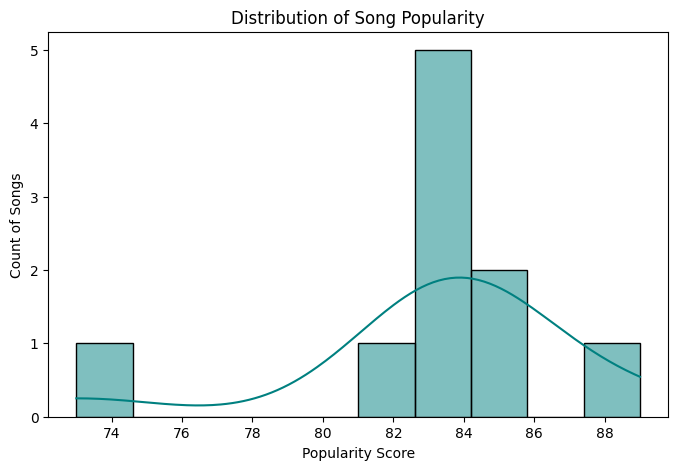

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=10, kde=True, color="teal")

plt.xlabel("Popularity Score")
plt.ylabel("Count of Songs")
plt.title("Distribution of Song Popularity")
plt.show()


##Scatter plot between Duration and Popularity

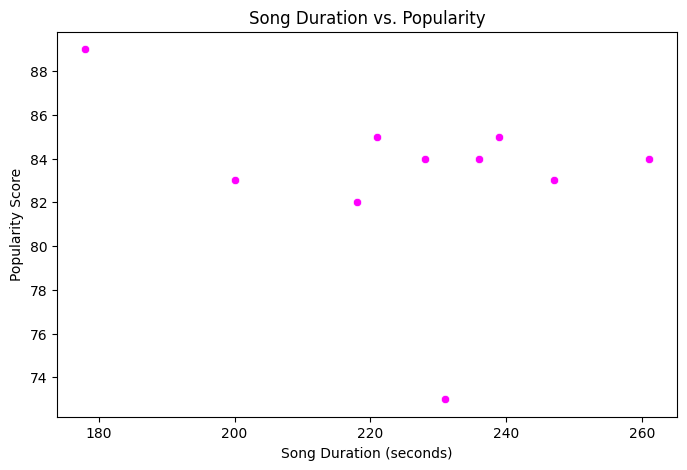

In [41]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Duration (s)'], y=df['Popularity'], color="magenta")

plt.xlabel("Song Duration (seconds)")
plt.ylabel("Popularity Score")
plt.title("Song Duration vs. Popularity")
plt.show()


In [42]:
print(df.shape)  # Check how many songs were retrieved
print(df['Album'].value_counts())  # Check album counts


(10, 5)
Album
Lover                                             2
THE TORTURED POETS DEPARTMENT                     2
folklore                                          2
1989                                              1
reputation Stadium Tour Surprise Song Playlist    1
reputation                                        1
Midnights                                         1
Name: count, dtype: int64


##Fetching All Songs from All Albums and plotting them

In [43]:

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_all_tracks(artist_name):
    results = sp.search(q=artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    albums = sp.artist_albums(artist_id, album_type='album,single', limit=50)['items']

    all_songs = []
    for album in albums:
        album_id = album['id']
        album_name = album['name']
        tracks = sp.album_tracks(album_id)['items']

        for track in tracks:
            all_songs.append([track['name'], album_name])  # Store song name + album name

    df = pd.DataFrame(all_songs, columns=['Song', 'Album'])
    return df

# Get ALL songs for Taylor Swift
df = get_all_tracks("Taylor Swift")

# Check if all songs are retrieved
print(df.shape)  # Should be much more than (10,2)
print(df['Album'].value_counts())  # Should list all albums properly


(635, 2)
Album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY                                           31
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
1989 (Taylor's Version) [Deluxe]                                                       22
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version)                                                                21
Midnights (3am Edition)                                                              

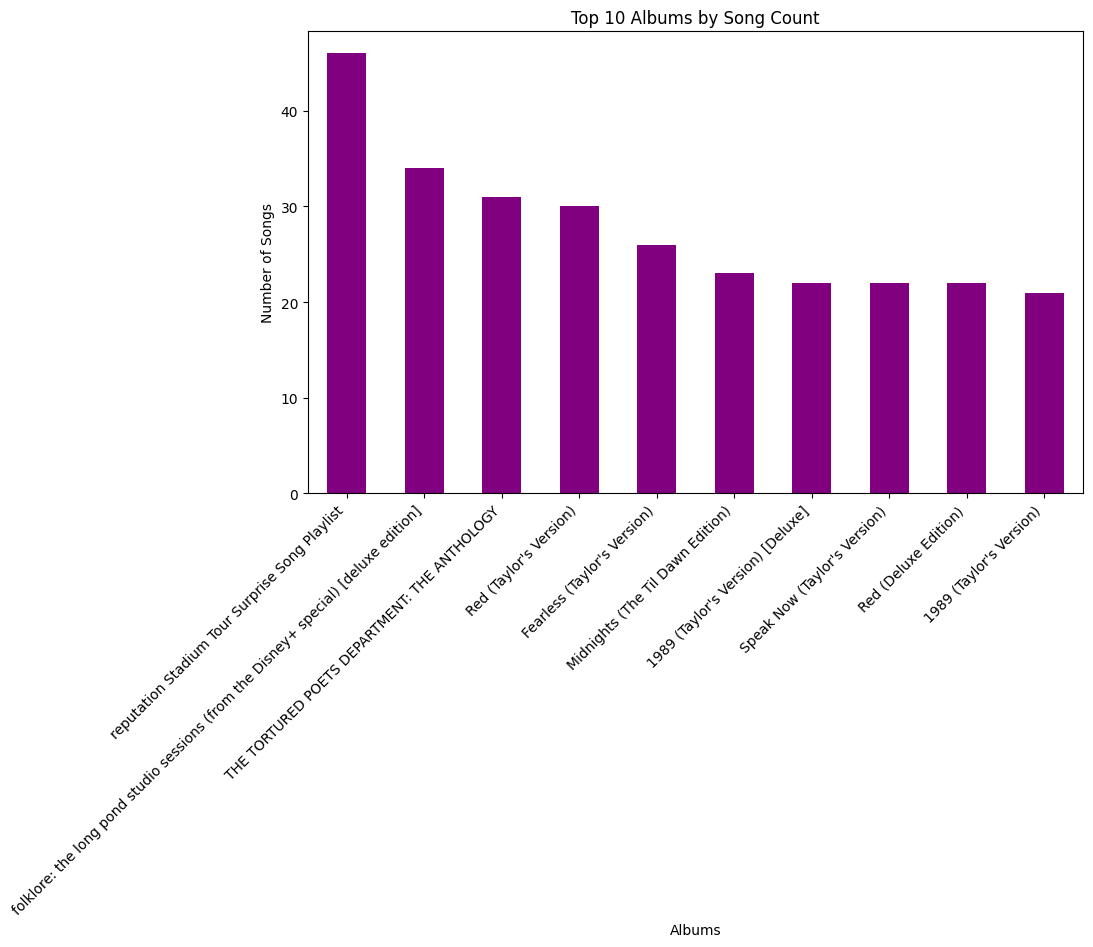

In [44]:
#Top 10 Albums by Song Count (Bar Chart)
plt.figure(figsize=(10,6))
df['Album'].value_counts().nlargest(10).plot(kind='bar', color="purple")

plt.xlabel("Albums")
plt.ylabel("Number of Songs")
plt.title("Top 10 Albums by Song Count")
plt.xticks(rotation=45, ha="right")
plt.show()


##Top 10 Songs By Popularity

In [45]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Initialize Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="YOUR_SPOTIFY_CLIENT_ID",
    client_secret="YOUR_SPOTIFY_CLIENT_SECRET"
))

def get_all_tracks_with_popularity(artist_name):
    # Get artist ID
    results = sp.search(q=artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    # Get all albums (both albums & singles)
    albums = sp.artist_albums(artist_id, album_type='album,single', limit=50)['items']

    all_songs = []
    for album in albums:
        album_id = album['id']
        album_name = album['name']
        tracks = sp.album_tracks(album_id)['items']

        for track in tracks:
            track_id = track['id']
            track_details = sp.track(track_id)  # Fetch additional track details (popularity)
            popularity = track_details['popularity']

            all_songs.append([
                track['name'],   # Song Name
                album_name,      # Album Name
                popularity       # Popularity Score
            ])

    df = pd.DataFrame(all_songs, columns=['Song', 'Album', 'Popularity'])
    return df

# Get all songs + popularity for Taylor Swift
df = get_all_tracks_with_popularity("Taylor Swift")

# Save and display data
df.to_csv("Taylor_Swift_all_tracks.csv", index=False)
print(df.shape)  # Check total songs
print(df.head())  # Display first few rows



(635, 3)
                                   Song  \
0         Fortnight (feat. Post Malone)   
1         The Tortured Poets Department   
2  My Boy Only Breaks His Favorite Toys   
3                              Down Bad   
4                       So Long, London   

                                          Album  Popularity  
0  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY          75  
1  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY          73  
2  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY          75  
3  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY          75  
4  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY          74  


##Visualizing the Top 10 Songs Popularity

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


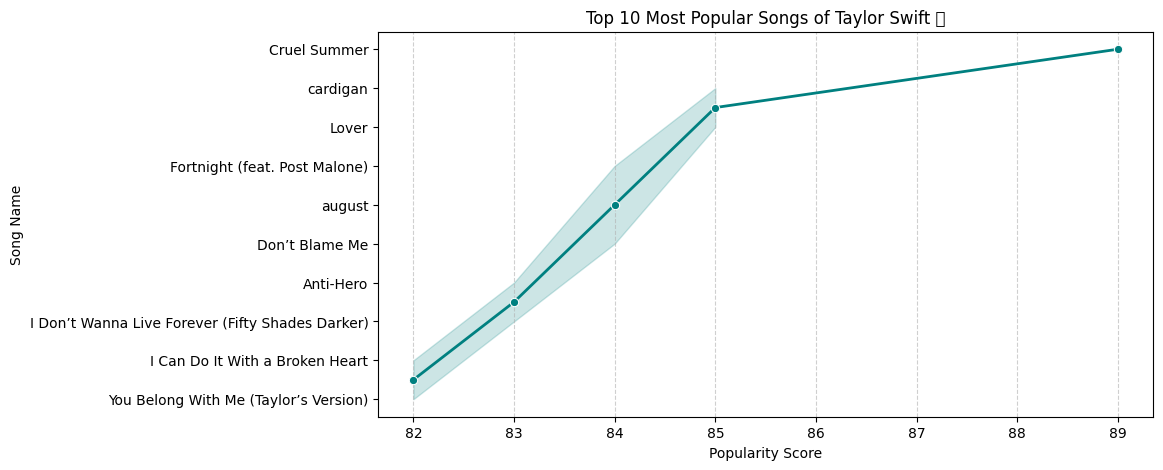

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 10 songs by popularity
top_songs = df.nlargest(10, 'Popularity').sort_values(by='Popularity', ascending=False)

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Popularity', y='Song', data=top_songs, marker='o', color="teal", linewidth=2)

# Labels and title
plt.xlabel("Popularity Score")
plt.ylabel("Song Name")
plt.title(f"Top 10 Most Popular Songs of Taylor Swift 🎶")
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add light gridlines
plt.show()


##Popularity Trend Across Albums Over Time

In [47]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=os.environ["SPOTIPY_CLIENT_ID"],
    client_secret=os.environ["SPOTIPY_CLIENT_SECRET"]
))

def get_artist_top_tracks(artist_name):
    results = sp.search(q=artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']

    tracks = sp.artist_top_tracks(artist_id)['tracks']

    data = []
    album_years_dict = {}  # Dictionary to store album release years

    for track in tracks:
        album_name = track['album']['name']
        album_id = track['album']['id']

        # Fetch album details to get release date
        if album_name not in album_years_dict:  # Avoid duplicate API calls
            album_details = sp.album(album_id)
            release_year = album_details['release_date'][:4]  # Extract only the year
            album_years_dict[album_name] = int(release_year)  # Convert to int

        data.append([
            track['name'],
            album_name,
            track['popularity'],
            track['duration_ms'] // 1000,
            track['external_urls']['spotify'],
            album_years_dict[album_name]  # Add release year
        ])

    df = pd.DataFrame(data, columns=['Song', 'Album', 'Popularity', 'Duration (s)', 'Spotify URL', 'Release Year'])
    return df

# Example: Get data for Taylor Swift
df = get_artist_top_tracks("Taylor Swift")
print(df.head())


                            Song                          Album  Popularity  \
0                   Cruel Summer                          Lover          89   
1  Fortnight (feat. Post Malone)  THE TORTURED POETS DEPARTMENT          84   
2                       cardigan                       folklore          85   
3                          Lover                          Lover          85   
4                         august                       folklore          84   

   Duration (s)                                            Spotify URL  \
0           178  https://open.spotify.com/track/1BxfuPKGuaTgP7aM0Bbdwr   
1           228  https://open.spotify.com/track/2OzhQlSqBEmt7hmkYxfT6m   
2           239  https://open.spotify.com/track/4R2kfaDFhslZEMJqAFNpdd   
3           221  https://open.spotify.com/track/1dGr1c8CrMLDpV6mPbImSI   
4           261  https://open.spotify.com/track/3hUxzQpSfdDqwM3ZTFQY0K   

   Release Year  
0          2019  
1          2024  
2          2020  
3       

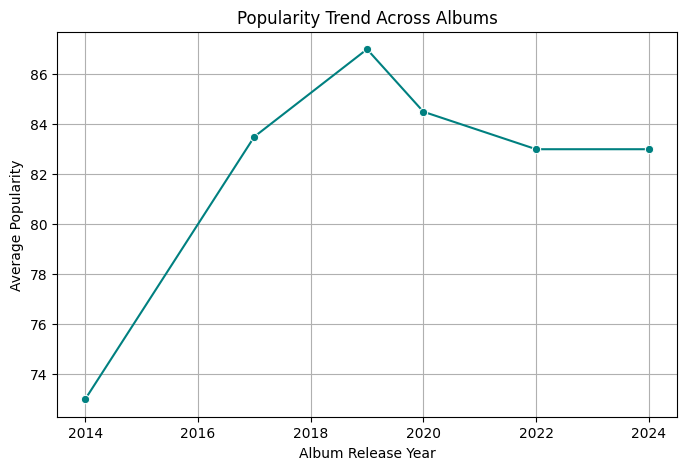

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by release year and calculate average popularity
popularity_trend = df.groupby('Release Year')['Popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Release Year', y='Popularity', data=popularity_trend, marker='o', color="teal")
plt.xlabel("Album Release Year")
plt.ylabel("Average Popularity")
plt.title("Popularity Trend Across Albums")
plt.grid()
plt.show()


<ipython-input-49-3863475f254b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Album', x='Hit Song', data=hit_ratio, palette='coolwarm')


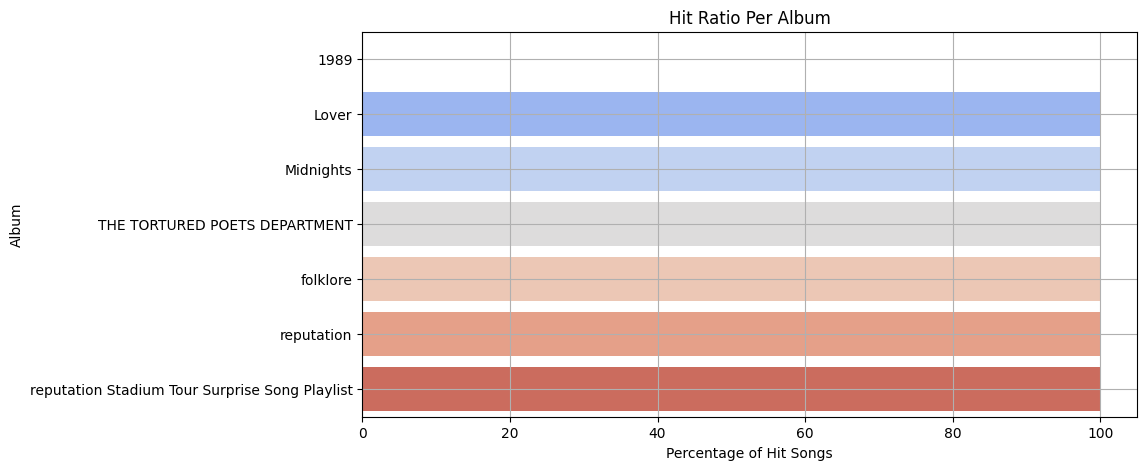

In [49]:
#How Many Songs Are Super Popular?
# Define a hit song (popularity > 80)
df['Hit Song'] = df['Popularity'] > 80

# Calculate percentage of hit songs per album
hit_ratio = df.groupby('Album')['Hit Song'].mean().reset_index()
hit_ratio['Hit Song'] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y='Album', x='Hit Song', data=hit_ratio, palette='coolwarm')
plt.xlabel("Percentage of Hit Songs")
plt.ylabel("Album")
plt.title("Hit Ratio Per Album")
plt.grid()
plt.show()


<ipython-input-50-09e758c1659b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Single', y='Popularity', data=popularity_comparison, palette=['magenta', 'teal'])


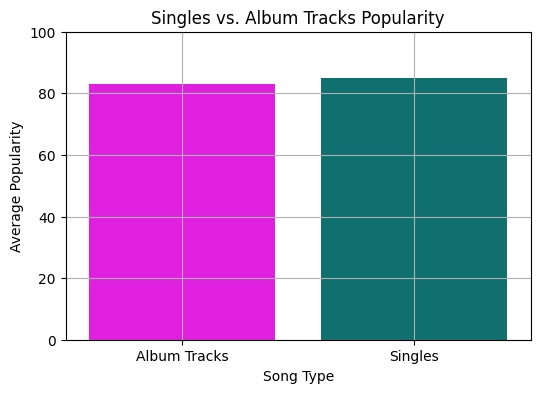

In [50]:
#Singles vs. Album Tracks Popularity
# Identify singles (songs where album name = song name)
df['Single'] = df['Song'] == df['Album']

# Calculate average popularity
popularity_comparison = df.groupby('Single')['Popularity'].mean().reset_index()

# Rename for clarity
popularity_comparison['Single'] = popularity_comparison['Single'].map({True: 'Singles', False: 'Album Tracks'})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Single', y='Popularity', data=popularity_comparison, palette=['magenta', 'teal'])
plt.xlabel("Song Type")
plt.ylabel("Average Popularity")
plt.title("Singles vs. Album Tracks Popularity")
plt.ylim(0, 100)
plt.grid()
plt.show()


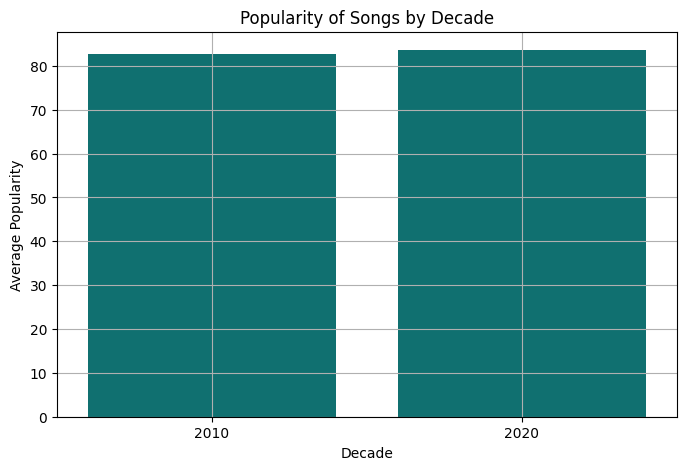

In [51]:
#Which Era was the most popular?
# Create a new column for the decade
df['Decade'] = (df['Release Year'] // 10) * 10

# Calculate average popularity per decade
decade_popularity = df.groupby('Decade')['Popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Decade', y='Popularity', data=decade_popularity, color='teal')
plt.xlabel("Decade")
plt.ylabel("Average Popularity")
plt.title("Popularity of Songs by Decade")
plt.grid()
plt.show()


<ipython-input-52-d193e904a0e5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Album', x='Feature', data=feature_count, palette='viridis')


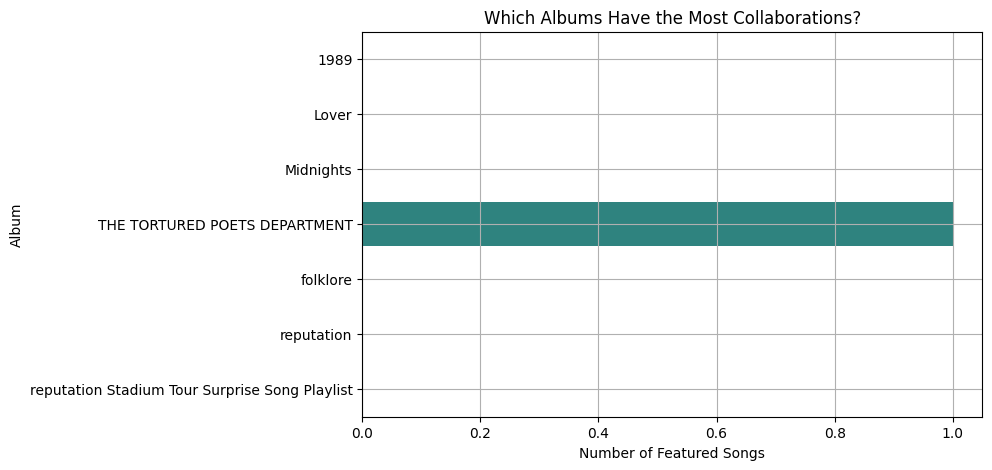

In [52]:
# Who Collaborates the Most?
# Identify featured artists (common format: 'Song Name (feat. Artist)')
df['Feature'] = df['Song'].str.contains(r'\(feat\.', regex=True)

# Count features per album
feature_count = df.groupby('Album')['Feature'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(y='Album', x='Feature', data=feature_count, palette='viridis')
plt.xlabel("Number of Featured Songs")
plt.ylabel("Album")
plt.title("Which Albums Have the Most Collaborations?")
plt.grid()
plt.show()
